In [151]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt
import pytesseract
import re
import imutils

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [178]:
labels = open('./input/yolo-weights-for-licence-plate-detector/classes.names').read()
print(labels)

LP



In [153]:
weights_path = './input/yolo-weights-for-licence-plate-detector/lapi.weights'
configuration_path = './input/yolo-weights-for-licence-plate-detector/darknet-yolov3.cfg'

probability_minimum = 0.5
threshold = 0.3

In [154]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()
#layers_names_output = [layers_names_all[i[0]-1] for i in network.getUnconnectedOutLayers()]
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]


# Put Rectngle on Plate

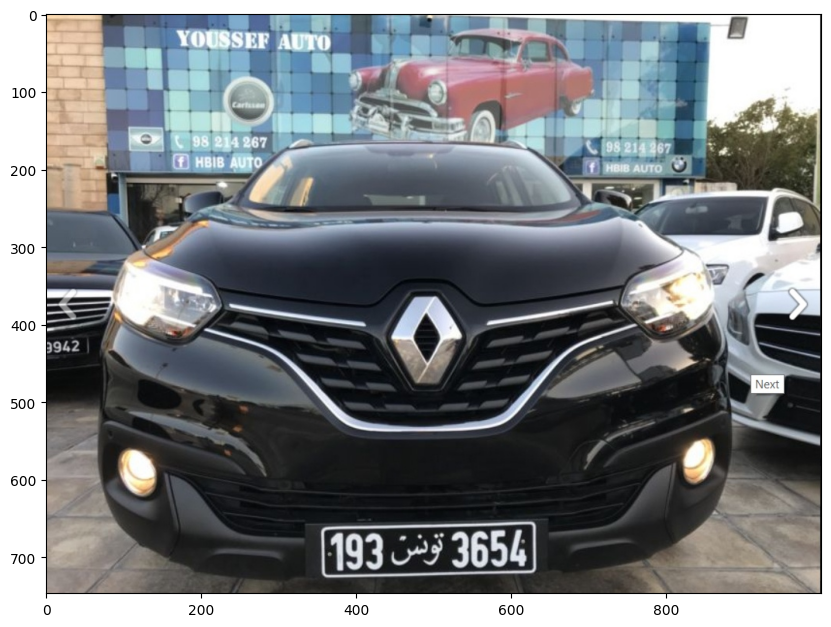

In [155]:
image_input = cv2.imread('./input/labeled-licence-plates-dataset/dataset/train/145.jpg')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [156]:
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)


network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [157]:
bounding_boxes = []
confidences = []
class_numbers = []
h,w = image_input.shape[:2]

for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)
         

In [158]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

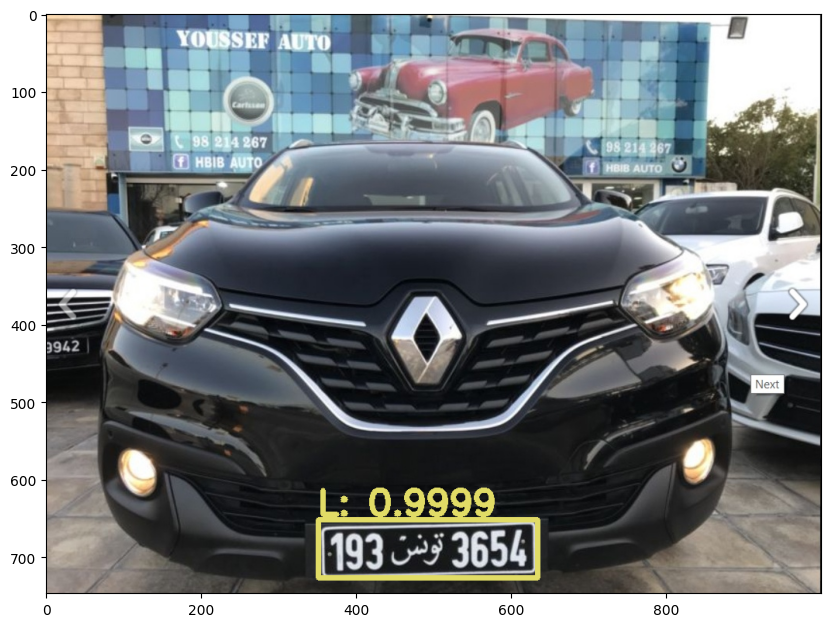

In [159]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

# Put Mosaic on Plate

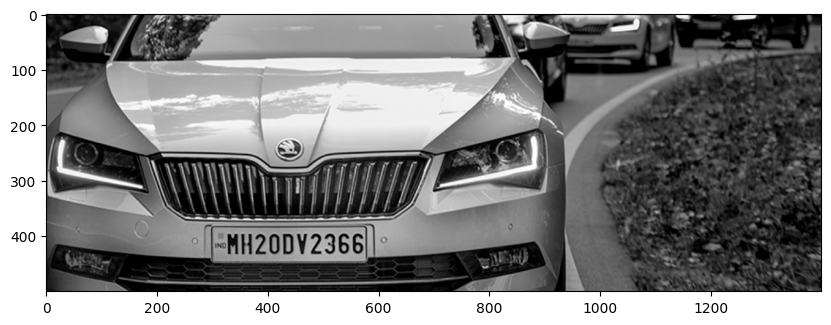

In [170]:
#image_input2 = cv2.imread('./input/labeled-licence-plates-dataset/dataset/train/149.jpg')
image_input2 = cv2.imread('./LPR/img3.png')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input2, cv2.COLOR_BGR2RGB))
plt.show()

In [161]:
def mosaic(src, ratio=0.1):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

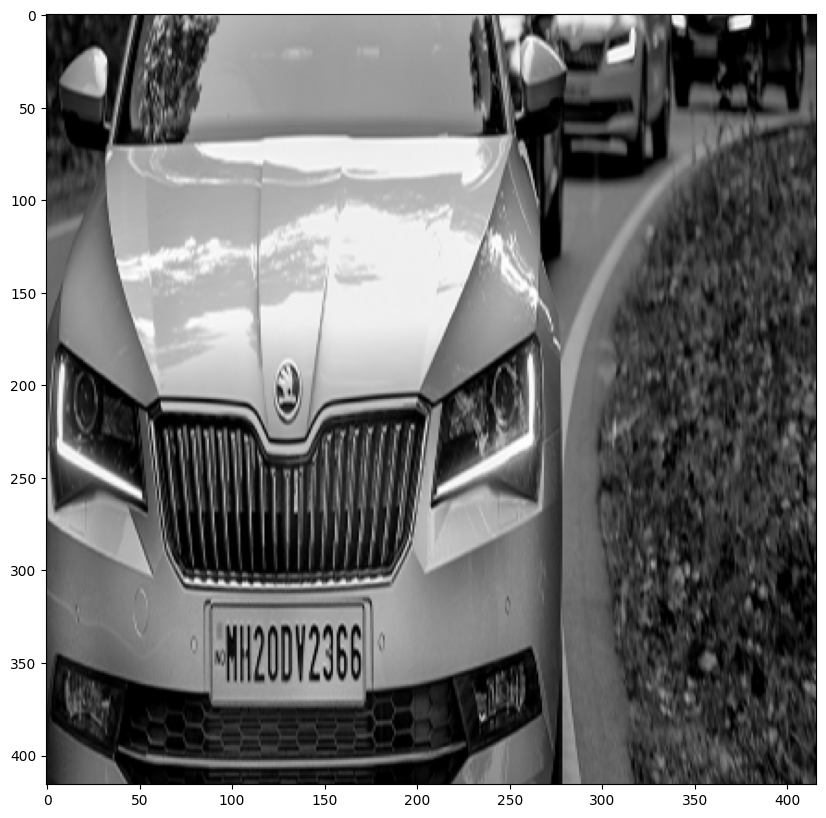

In [176]:
blob = cv2.dnn.blobFromImage(image_input2, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)

plt.imshow(blob_to_show)
plt.show()


network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [163]:
bounding_boxes = []
confidences = []
class_numbers = []
h,w = image_input2.shape[:2]

for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)


In [164]:
test=image_input2.copy()

In [165]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)
print(results)
if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        mosaic_image=mosaic(image_input2[(y_min):(y_min+box_height),(x_min):(x_min+box_width)])
        image_input2[(y_min):(y_min+box_height),(x_min):(x_min+box_width)]=mosaic_image

()


In [166]:
results

()

In [167]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [183]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
crop=cv2.cvtColor(test[(y_min):(y_min+box_height),(x_min):(x_min+box_width)], cv2.COLOR_BGR2RGB)
#crop_rotated = imutils.rotate_bound(crop, 10)
#crop_rotated= rotate_image(crop, 150)
plt.imshow(crop)
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [147]:
#osd_rotated_image = pytesseract.image_to_osd(crop)

In [182]:
for angle in range(-10,10,1):
    crop_rotated = imutils.rotate_bound(crop, angle)
    text = pytesseract.image_to_string(crop_rotated, lang='eng', config='--psm 7')
    text = re.sub('[\W]', '', text)
    print(angle, text)

-10 A
-9 i
-8 an
-7 an
-6 
-5 
-4 oo
-3 wail
-2 wail
-1 eni
0 Vl
1 oe
2 a
3 aa
4 naa
5 sanae
6 annbail
7 sometal
8 a
9 me


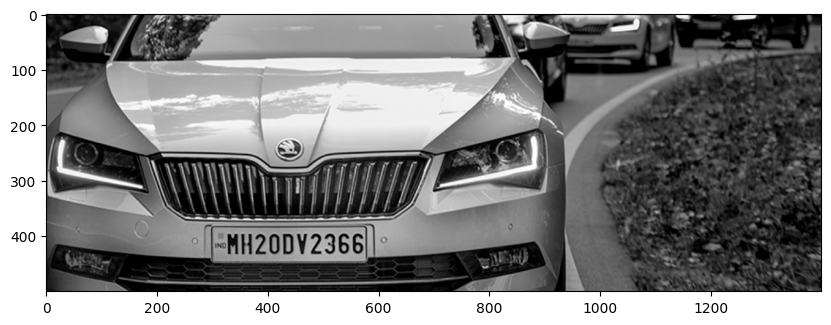

In [149]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input2, cv2.COLOR_BGR2RGB))
plt.show()